# Data exploration plots

In [ ]:
# !pip install adjustText

Defaulting to user installation because normal site-packages is not writeable


In [ ]:
# IMPORTS
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from adjustText import adjust_text

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from scipy.optimize import curve_fit

from matplotlib.lines import Line2D

## Max days vs number of time points

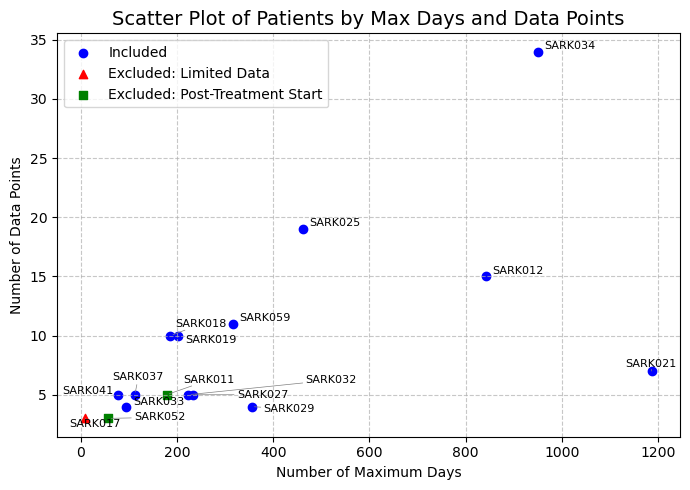

In [ ]:
# Data
data = {
    "ID": [
        "SARK012", "SARK018", "SARK019", "SARK034", "SARK017", "SARK021",
        "SARK025", "SARK041", "SARK011", "SARK027", "SARK029", "SARK032",
        "SARK033", "SARK037", "SARK052", "SARK059"
    ],
    "MaxDays": [843, 186, 202, 951, 9, 1187, 462, 77, 178, 232, 355, 223, 93, 112, 57, 317],
    "DataPoints": [15, 10, 10, 34, 3, 7, 19, 5, 5, 5, 4, 5, 4, 5, 3, 11]
}
df = pd.DataFrame(data)

# Grouping
limited_data = ["SARK017"]
post_treatment = ["SARK011", "SARK052"]
included_df = df[~df["ID"].isin(limited_data + post_treatment)]
limited_df = df[df["ID"].isin(limited_data)]
post_treatment_df = df[df["ID"].isin(post_treatment)]

# Plot
plt.figure(figsize=(7, 5))
plt.scatter(included_df["MaxDays"], included_df["DataPoints"], label="Included", color="blue", marker='o')
plt.scatter(limited_df["MaxDays"], limited_df["DataPoints"], label="Excluded: Limited Data", color="red", marker='^')
plt.scatter(post_treatment_df["MaxDays"], post_treatment_df["DataPoints"], label="Excluded: Post-Treatment Start", color="green", marker='s')

# Label points
texts = []
for i, row in df.iterrows():
    texts.append(plt.text(row["MaxDays"], row["DataPoints"], row["ID"], fontsize=8))

adjust_text(texts, arrowprops=dict(arrowstyle='-', color='gray', lw=0.5))

# Polish
plt.xlabel("Number of Maximum Days")
plt.ylabel("Number of Data Points")
plt.title("Scatter Plot of Patients by Max Days and Data Points", fontsize=14)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


### Fitting curves

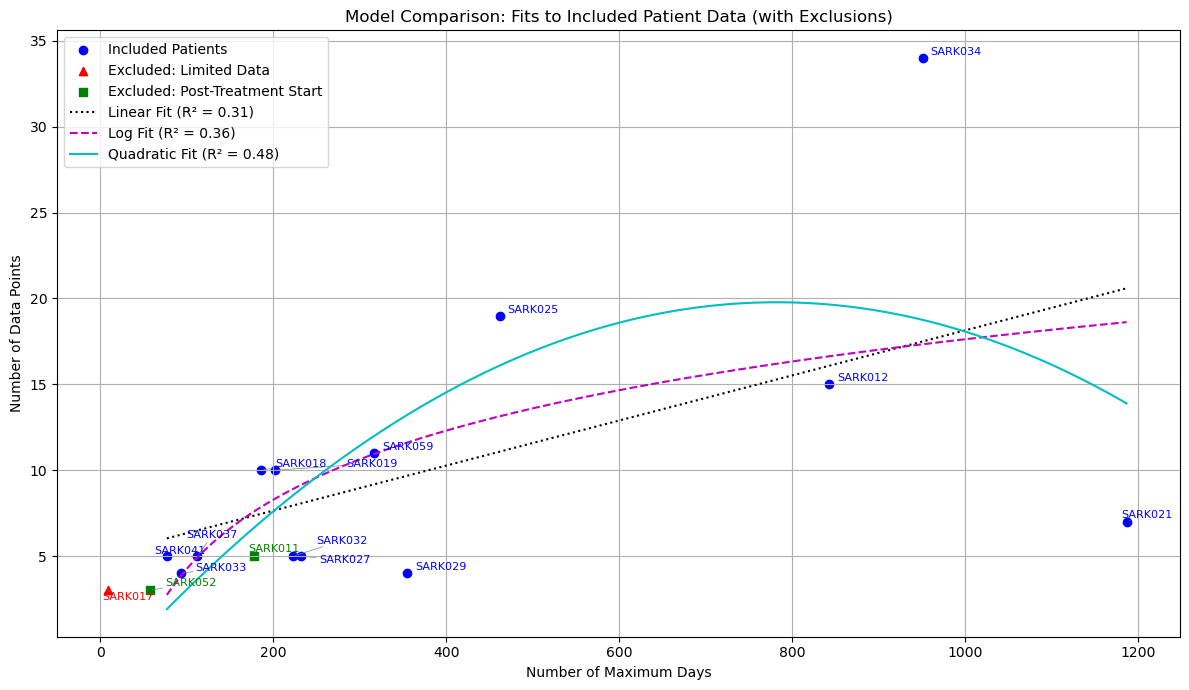

In [ ]:
# Data
data = {
    "ID": [
        "SARK012", "SARK018", "SARK019", "SARK034", "SARK017", "SARK021",
        "SARK025", "SARK041", "SARK011", "SARK027", "SARK029", "SARK032",
        "SARK033", "SARK037", "SARK052", "SARK059"
    ],
    "MaxDays": [843, 186, 202, 951, 9, 1187, 462, 77, 178, 232, 355, 223, 93, 112, 57, 317],
    "DataPoints": [15, 10, 10, 34, 3, 7, 19, 5, 5, 5, 4, 5, 4, 5, 3, 11]
}

df = pd.DataFrame(data)

# Define exclusion groups
limited_data = ["SARK017"]
post_treatment = ["SARK011", "SARK052"]
excluded = limited_data + post_treatment

included_df = df[~df["ID"].isin(excluded)]
limited_df = df[df["ID"].isin(limited_data)]
post_treatment_df = df[df["ID"].isin(post_treatment)]

X = included_df["MaxDays"].values
y = included_df["DataPoints"].values

# --- 1. Linear ---
linear_model = LinearRegression()
linear_model.fit(X.reshape(-1, 1), y)
x_range = np.linspace(min(X), max(X), 500)
y_linear = linear_model.predict(x_range.reshape(-1, 1))
r2_linear = r2_score(y, linear_model.predict(X.reshape(-1, 1)))

# --- 2. Logarithmic ---
def log_func(x, a, b):
    return a * np.log(x) + b

params_log, _ = curve_fit(log_func, X, y)
y_log_fit = log_func(x_range, *params_log)
r2_log = r2_score(y, log_func(X, *params_log))

# --- 3. Quadratic ---
def quad_func(x, a, b, c):
    return a * x**2 + b * x + c

params_quad, _ = curve_fit(quad_func, X, y)
y_quad = quad_func(x_range, *params_quad)
r2_quad = r2_score(y, quad_func(X, *params_quad))

# --- Plot ---
plt.figure(figsize=(12, 7))

# Plot each group
plt.scatter(included_df["MaxDays"], included_df["DataPoints"], color='blue', marker='o', label="Included Patients")
plt.scatter(limited_df["MaxDays"], limited_df["DataPoints"], color='red', marker='^', label="Excluded: Limited Data")
plt.scatter(post_treatment_df["MaxDays"], post_treatment_df["DataPoints"], color='green', marker='s', label="Excluded: Post-Treatment Start")

# Label all with adjust_text
texts = []
for _, row in df.iterrows():
    color = 'black'
    if row["ID"] in limited_data:
        color = 'red'
    elif row["ID"] in post_treatment:
        color = 'green'
    elif row["ID"] in included_df["ID"].values:
        color = 'blue'
    texts.append(plt.text(row["MaxDays"], row["DataPoints"], row["ID"], fontsize=8, color=color))

adjust_text(texts, arrowprops=dict(arrowstyle='-', color='gray', lw=0.5))

# Plot regression curves
plt.plot(x_range, y_linear, 'k:', label=f"Linear Fit (R² = {r2_linear:.2f})")
plt.plot(x_range, y_log_fit, 'm--', label=f"Log Fit (R² = {r2_log:.2f})")
plt.plot(x_range, y_quad, 'c-', label=f"Quadratic Fit (R² = {r2_quad:.2f})")

# Labels & legend
plt.xlabel("Number of Maximum Days")
plt.ylabel("Number of Data Points")
plt.title("Model Comparison: Fits to Included Patient Data (with Exclusions)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


## Sampling regularity

         ID  MaxDays  DataPoints     MeanGap      StdGap  \
0   SARK012      843          15   60.214286  100.569932   
1   SARK018      186          10   20.666667   25.529939   
2   SARK019      202          10   22.444444   16.276166   
3   SARK034      951          34   28.818182   20.633093   
4   SARK017        9           3    4.500000    2.500000   
5   SARK021     1187           7  197.833333  252.927800   
6   SARK025      462          19   25.666667   36.033935   
7   SARK041       77           5   19.250000   19.109880   
8   SARK011      178           5   44.500000   34.165041   
9   SARK027      232           5   58.000000   66.215557   
10  SARK029      355           4  118.333333   82.382576   
11  SARK032      223           5   55.750000   42.061711   
12  SARK033       93           4   31.000000   27.531800   
13  SARK037      112           5   28.000000   25.347584   
14  SARK052       57           3   28.500000    8.500000   
15  SARK059      317          11   31.70

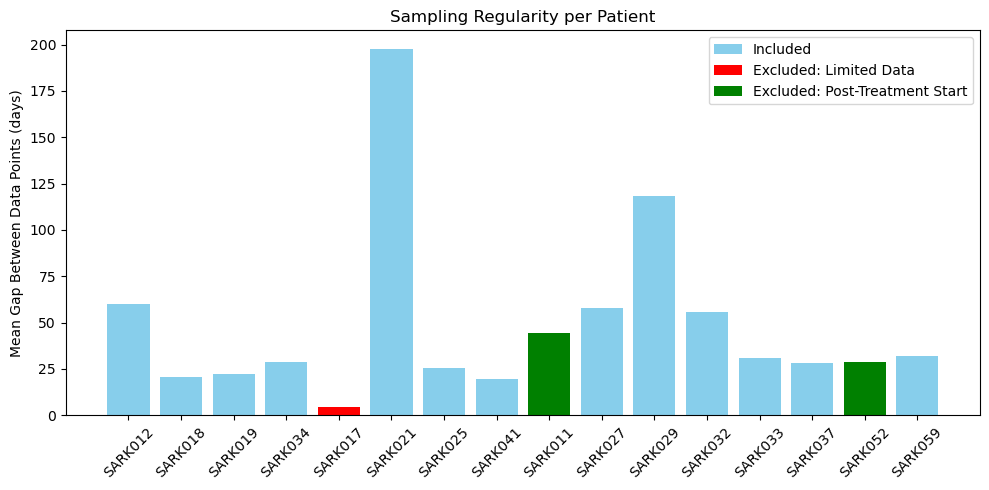

In [ ]:
# Step 1: Parse raw day-level data
raw_data = """
Day 0	Day 24	Day 44	Day 65	Day 86	Day 107	Day 122	Day 129	Day 150	Day 213	Day 241	Day 262	Day 283	Day 679	Day 843
Day 0	Day 2	Day 93	Day 107	Day 121	Day 135	Day 149	Day 163	Day 184	Day 186
Day 0	Day 1	Day 49	Day 95	Day 97	Day 130	Day 151	Day 172	Day 181	Day 202
Day 0	Day 15	Day 18	Day 36	Day 44	Day 51	Day 72	Day 80	Day 90	Day 92	Day 150	Day 176	Day 183	Day 209	Day 224	Day 261	Day 293	Day 296	Day 339	Day 430	Day 489	Day 538	Day 588	Day 632	Day 654	Day 696	Day 717	Day 737	Day 769	Day 790	Day 860	Day 884	Day 923	Day 951
Day 0	Day 7	Day 9
Day 0	Day 49	Day 51	Day 89	Day 246	Day 445	Day 1187
Day 0	Day 3	Day 23	Day 48	Day 69	Day 76	Day 98	Day 100	Day 119	Day 139	Day 181	Day 188	Day 211	Day 218	Day 225	Day 239	Day 273	Day 441	Day 462
Day 0	Day 2	Day 51	Day 74	Day 77
Day 0	Day 20	Day 95	Day 97	Day 178
Day 0	Day 4	Day 25	Day 61	Day 232
Day 0	Day 2	Day 173	Day 355
Day 0	Day 30	Day 112	Day 114	Day 223
Day 0	Day 23	Day 91	Day 93
Day 0	Day 2	Day 21	Day 42	Day 112
Day 0	Day 20	Day 57
Day 0	Day 2	Day 43	Day 56	Day 58	Day 77	Day 98	Day 126	Day 147	Day 168	Day 317
"""

patient_days = [
    sorted([int(entry.strip().replace("Day ", "")) for entry in line.split("\t") if entry.strip()])
    for line in raw_data.strip().split("\n")
]

# Step 2: Patient metadata
patient_ids = [
    "SARK012", "SARK018", "SARK019", "SARK034", "SARK017", "SARK021",
    "SARK025", "SARK041", "SARK011", "SARK027", "SARK029", "SARK032",
    "SARK033", "SARK037", "SARK052", "SARK059"
]

max_days = [843, 186, 202, 951, 9, 1187, 462, 77, 178, 232, 355, 223, 93, 112, 57, 317]
data_points = [15, 10, 10, 34, 3, 7, 19, 5, 5, 5, 4, 5, 4, 5, 3, 11]

# Step 3: Compute extra stats per patient
mean_gaps = []
std_gaps = []

for days in patient_days:
    if len(days) < 2:
        mean_gaps.append(np.nan)
        std_gaps.append(np.nan)
    else:
        gaps = np.diff(days)
        mean_gaps.append(np.mean(gaps))
        std_gaps.append(np.std(gaps))

# Step 4: Create final dataframe
df = pd.DataFrame({
    "ID": patient_ids,
    "MaxDays": max_days,
    "DataPoints": data_points,
    "MeanGap": mean_gaps,
    "StdGap": std_gaps,
    "AllDays": patient_days
})

# Show result
print(df)

# # Step 5: Optional plot: mean gap per patient
# plt.figure(figsize=(10, 5))
# plt.bar(df["ID"], df["MeanGap"], color="skyblue")
# plt.xticks(rotation=45)
# plt.ylabel("Mean Gap Between Data Points (days)")
# plt.title("Sampling Regularity per Patient")
# plt.tight_layout()
# plt.show()
 



# Define excluded patient IDs
limited_data = ["SARK017"]
post_treatment = ["SARK011", "SARK052"]

# Set bar colors by category
colors = []
for pid in df["ID"]:
    if pid in limited_data:
        colors.append("red")
    elif pid in post_treatment:
        colors.append("green")
    else:
        colors.append("skyblue")

# Plot with color-coded bars
plt.figure(figsize=(10, 5))
bars = plt.bar(df["ID"], df["MeanGap"], color=colors)
plt.xticks(rotation=45)
plt.ylabel("Mean Gap Between Data Points (days)")
plt.title("Sampling Regularity per Patient")

# Add custom legend
from matplotlib.patches import Patch
legend_elements = [
    Patch(facecolor="skyblue", label="Included"),
    Patch(facecolor="red", label="Excluded: Limited Data"),
    Patch(facecolor="green", label="Excluded: Post-Treatment Start")
]
plt.legend(handles=legend_elements)

plt.tight_layout()
plt.show()


## Retained data at cutoff

In [15]:
cutoffs = [70, 100, 200, 300]
percentages = {day: [] for day in cutoffs}

for days in patient_days:
    total = len(days)
    for cutoff in cutoffs:
        kept = len([d for d in days if d <= cutoff])
        percentages[cutoff].append((kept / total) * 100 if total > 0 else 0)


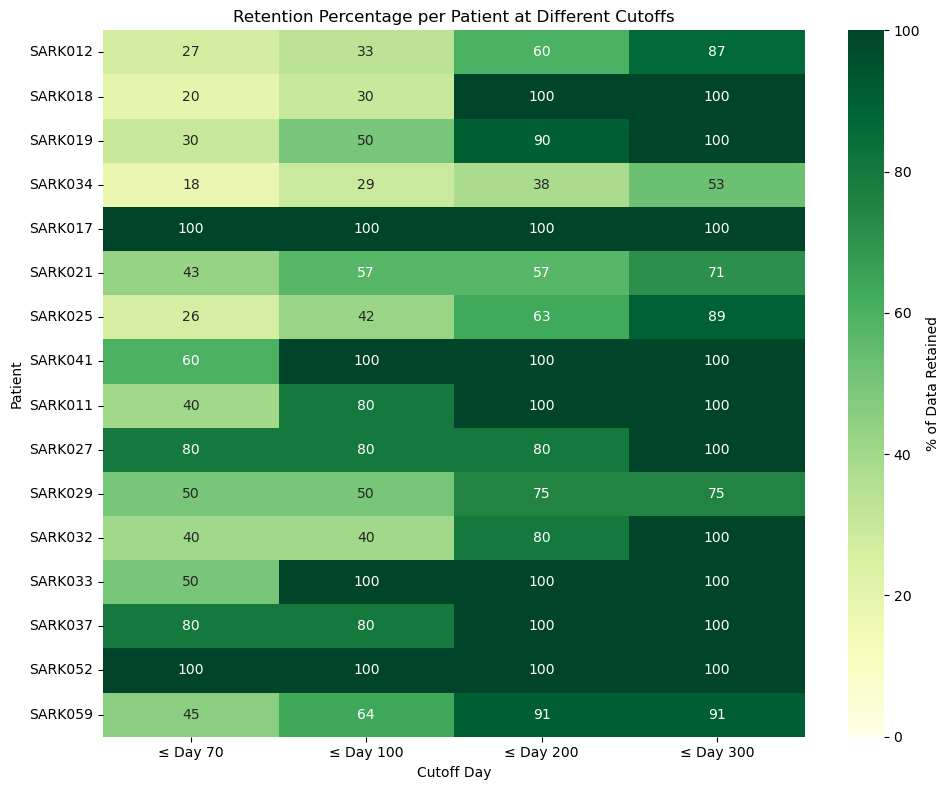

In [ ]:
# 1. Convert to DataFrame
heatmap_df = pd.DataFrame(percentages, index=patient_ids)
heatmap_df.columns = [f"≤ Day {c}" for c in heatmap_df.columns]

# 2. Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(
    heatmap_df,
    annot=True,
    fmt=".0f",
    cmap="YlGn",
    vmin=0,
    vmax=100,
    cbar_kws={'label': '% of Data Retained'}
)

plt.title("Retention Percentage per Patient at Different Cutoffs")
plt.xlabel("Cutoff Day")
plt.ylabel("Patient")
plt.tight_layout()
plt.show()


## Retained datapoints

In [49]:
cutoffs = [70, 100, 200, 300]
datapoints = {day: [] for day in cutoffs}

for days in patient_days:
    total = len(days)
    for cutoff in cutoffs:
        kept = len([d for d in days if d <= cutoff])
        datapoints[cutoff].append(kept if total > 0 else 0)

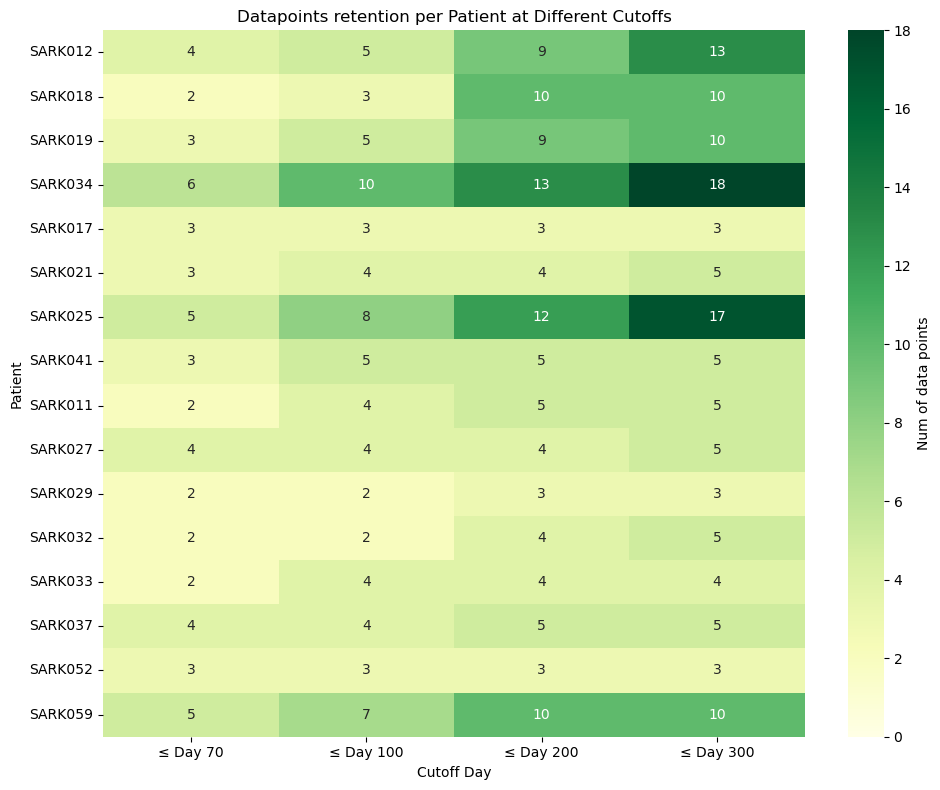

In [52]:
# 1. Convert to DataFrame
heatmap_df2 = pd.DataFrame(datapoints, index=patient_ids)
heatmap_df2.columns = [f"≤ Day {c}" for c in heatmap_df2.columns]

# 2. Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(
    heatmap_df2,
    annot=True,
    fmt=".0f",
    cmap="YlGn",
    vmin=0,
    cbar_kws={'label': 'Num of data points'}
)

plt.title("Datapoints retention per Patient at Different Cutoffs")
plt.xlabel("Cutoff Day")
plt.ylabel("Patient")
plt.tight_layout()
plt.show()

## Time scatter visualisation

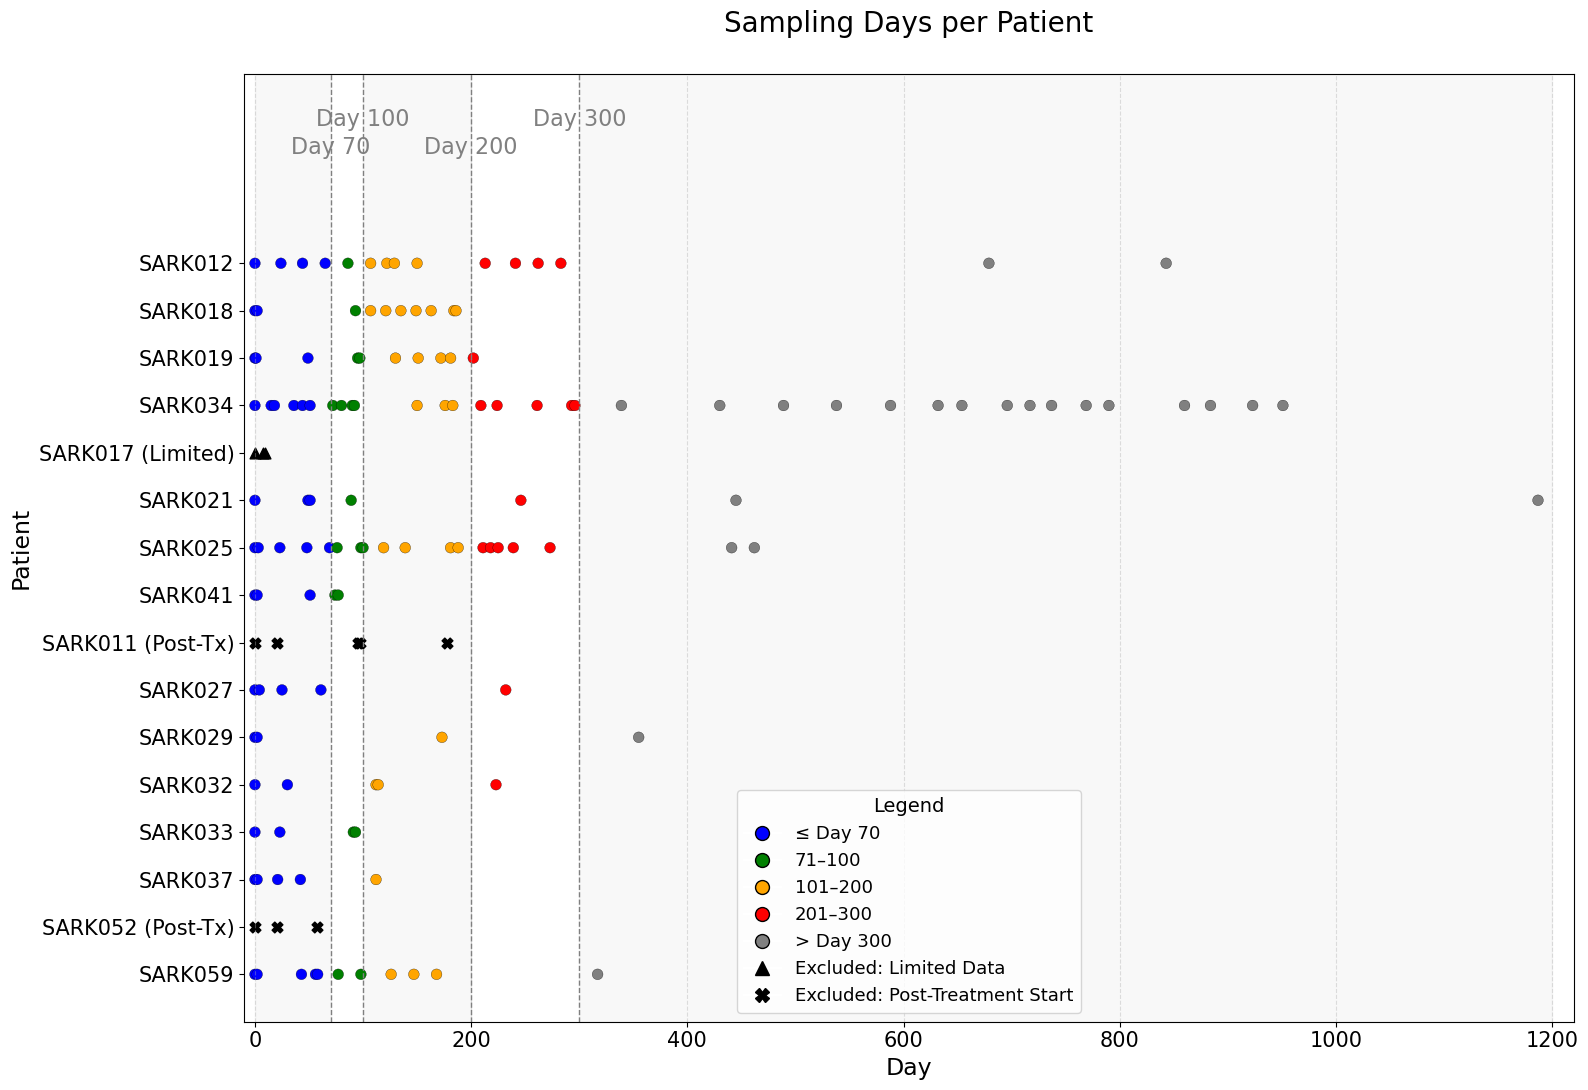

In [ ]:
# Cutoffs and color bins
cutoffs = [70, 100, 200, 300]
cutoff_colors = ['blue', 'green', 'orange', 'red', 'gray']
cutoff_labels = ['≤ Day 70', '71–100', '101–200', '201–300', '> Day 300']

excluded_limited = ['SARK017']
excluded_post_treatment = ['SARK011', 'SARK052']

def get_color(day):
    if day <= 70:
        return 'blue'
    elif day <= 100:
        return 'green'
    elif day <= 200:
        return 'orange'
    elif day <= 300:
        return 'red'
    else:
        return 'gray'

# --- Plot ---
fig, ax = plt.subplots(figsize=(16, 11))

# Background zones
for i, (start, end) in enumerate(zip([0] + cutoffs, cutoffs + [1200])):
    ax.axvspan(start, end, color='gray' if i % 2 == 0 else 'white', alpha=0.05)

# Plot each patient (top-to-bottom = original order)
yticks = []
ylabels = []
num_patients = len(patient_ids)

for i, (pid, days) in enumerate(zip(patient_ids, patient_days)):
    y = [num_patients - i - 1] * len(days)
    colors = [get_color(d) for d in days]

    if pid in excluded_limited:
        ax.scatter(days, y, c='black', s=60, marker='^', edgecolor='black')
        ylabels.append(f"{pid} (Limited)")
    elif pid in excluded_post_treatment:
        ax.scatter(days, y, c='black', s=60, marker='X', edgecolor='black')
        ylabels.append(f"{pid} (Post-Tx)")
    else:
        ax.scatter(days, y, c=colors, s=60, marker='o', edgecolor='black', linewidth=0.2)
        ylabels.append(pid)

    yticks.append(num_patients - i - 1)

# Cutoff lines + spaced labels
for i, vline in enumerate(cutoffs):
    ax.axvline(x=vline, color='gray', linestyle='--', linewidth=1)
    y_offset = num_patients + 1.2 + (0.6 if i % 2 else 0)  # Increased spacing
    ax.annotate(f'Day {vline}', xy=(vline, y_offset), ha='center', va='bottom', fontsize=16, color='gray')

# Axis formatting
ax.set_yticks(yticks)
ax.set_yticklabels(ylabels, fontsize=15)
ax.tick_params(axis='x', labelsize=15)  # FIXED
ax.set_xlabel("Day", fontsize=17)
ax.set_ylabel("Patient", fontsize=17)
ax.set_title("Sampling Days per Patient", fontsize=20, pad=30)
ax.set_xlim(-10, 1220)
ax.set_ylim(-1, num_patients + 3)
ax.grid(True, axis='x', linestyle='--', alpha=0.4)

# Legend
legend_elements = [
    Line2D([0], [0], marker='o', color='w', label=cutoff_labels[i],
           markerfacecolor=cutoff_colors[i], markeredgecolor='k', markersize=10)
    for i in range(len(cutoff_colors))
]
legend_elements += [
    Line2D([0], [0], marker='^', color='w', label='Excluded: Limited Data',
           markerfacecolor='black', markeredgecolor='k', markersize=10),
    Line2D([0], [0], marker='X', color='w', label='Excluded: Post-Treatment Start',
           markerfacecolor='black', markeredgecolor='k', markersize=10)
]

ax.legend(
    handles=legend_elements,
    title="Legend",
    loc='best',
    fontsize=13,
    title_fontsize=14
)

plt.tight_layout()

# --- Save files ---
plt.savefig("sampling_days_per_patient.png", dpi=300)
plt.savefig("sampling_days_per_patient.pdf")

plt.show()
